# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Training Test and Valid Set

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
)


Found 70295 files belonging to 38 classes.


In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
)


Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
        print(x,x.shape)
        print(y,y.shape)
        break

tf.Tensor(
[[[[113.   107.   119.  ]
   [117.25 111.25 123.25]
   [111.25 105.25 117.25]
   ...
   [116.5  109.5  125.5 ]
   [113.25 106.25 122.25]
   [112.5  105.5  121.5 ]]

  [[114.75 108.75 120.75]
   [114.75 108.75 120.75]
   [102.25  96.25 108.25]
   ...
   [114.   107.   123.  ]
   [124.75 117.75 133.75]
   [112.75 105.75 121.75]]

  [[109.75 103.75 115.75]
   [111.5  105.5  117.5 ]
   [105.75  99.75 111.75]
   ...
   [114.25 107.25 123.25]
   [117.   110.   126.  ]
   [116.75 109.75 125.75]]

  ...

  [[148.75 140.75 155.75]
   [147.75 139.75 154.75]
   [151.   143.   158.  ]
   ...
   [152.   143.   160.  ]
   [150.   141.   158.  ]
   [148.5  139.5  156.5 ]]

  [[147.25 139.25 154.25]
   [146.5  138.5  153.5 ]
   [149.5  141.5  156.5 ]
   ...
   [152.25 143.25 160.25]
   [151.   142.   159.  ]
   [150.25 141.25 158.25]]

  [[150.   142.   157.  ]
   [147.75 139.75 154.75]
   [149.   141.   156.  ]
   ...
   [150.   141.   158.  ]
   [151.25 142.25 159.25]
   [152.   143.   16

# Importing Libraries For Model and Layers


In [7]:
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

# Creating Model

In [8]:
model=Sequential()

# Adding Convolution Neural Network

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\rajde\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

### Dropping excess data to avoid overfitting

In [14]:
model.add(Dropout(0.25))

### Falttening the feature map after pooling

In [15]:
model.add(Flatten())

### Adding Dense layer

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

### Adding 38 classes of our test and valid data

In [18]:
model.add(Dense(units=38,activation='softmax'))

# Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,#To avoid overshooting
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name="adam",
   
)
,loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Training model on training and validation set 

In [21]:
training_history= model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1469s 666ms/step - accuracy: 0.3878 - loss: 2.1856 - val_accuracy: 0.7948 - val_loss: 0.6521
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1380s 628ms/step - accuracy: 0.8345 - loss: 0.5259 - val_accuracy: 0.9110 - val_loss: 0.2765
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2392s 1s/step - accuracy: 0.9008 - loss: 0.3057 - val_accuracy: 0.8859 - val_loss: 0.3665
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8926s 4s/step - accuracy: 0.9343 - loss: 0.2071 - val_accuracy: 0.9357 - val_loss: 0.1979
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2512s 1s/step - accuracy: 0.9494 - loss: 0.1549 - val_accuracy: 0.9384 - val_loss: 0.1978
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1266s 576ms/step - accuracy: 0.9606 - loss: 0.1216 - val_accuracy: 0.9574 - val_loss: 0.1384
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1277s 581ms/step - accuracy: 0.9720 - loss: 0.0860 - val_accuracy: 0.9641 - val_loss: 0.1277
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1264s 576ms/step - acc

# Evaluating the training and validation set

In [22]:
training_loss,training_accu = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 299s 136ms/step - accuracy: 0.9814 - loss: 0.0588


In [23]:
print(training_loss,training_accu)

0.05478965863585472 0.9827584028244019


In [24]:
validation_loss,validation_accu = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 81s 148ms/step - accuracy: 0.9551 - loss: 0.1563


In [25]:
print(validation_loss,validation_accu)

0.16210104525089264 0.9554404616355896


# Saving Model

In [58]:
model.save('Trained_Model.keras')

In [59]:
model.save('Trained_Model.h5')

In [43]:
training_history.history

{'accuracy': [0.5930436253547668,
  0.8576854467391968,
  0.9109609723091125,
  0.938245952129364,
  0.9532541632652283,
  0.9633544087409973,
  0.9715626835823059,
  0.9746923446655273,
  0.9803969264030457,
  0.9803115725517273],
 'loss': [1.3860158920288086,
  0.44864532351493835,
  0.2724829912185669,
  0.19170646369457245,
  0.14375272393226624,
  0.11313764750957489,
  0.0864502489566803,
  0.07744164019823074,
  0.061553146690130234,
  0.0606522262096405],
 'val_accuracy': [0.7948440909385681,
  0.9109947681427002,
  0.8858979940414429,
  0.9356931447982788,
  0.9383678436279297,
  0.9574322700500488,
  0.9640905857086182,
  0.9528796076774597,
  0.9483838081359863,
  0.9554404616355896],
 'val_loss': [0.6520680785179138,
  0.2764723300933838,
  0.3664591908454895,
  0.1978520303964615,
  0.19778087735176086,
  0.13838770985603333,
  0.12766921520233154,
  0.16230149567127228,
  0.17681068181991577,
  0.16210104525089264]}

# Recording training history

In [44]:
import json
with open("Training_Hist.json","w") as f:
    json.dump(training_history.history,f)

In [45]:
training_history.history['accuracy']

[0.5930436253547668,
 0.8576854467391968,
 0.9109609723091125,
 0.938245952129364,
 0.9532541632652283,
 0.9633544087409973,
 0.9715626835823059,
 0.9746923446655273,
 0.9803969264030457,
 0.9803115725517273]

# Visualizing Accuracy 

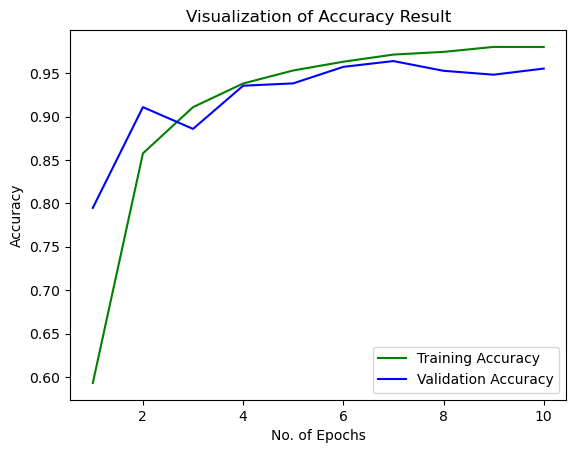

In [46]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

# Visualizing Loss

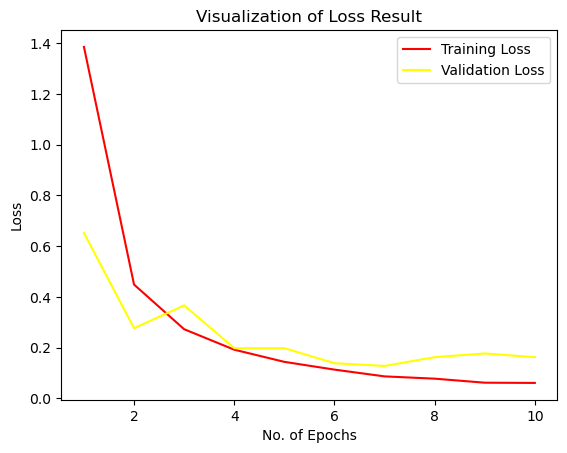

In [47]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='yellow',label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

# Evaluating on other basis

In [48]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [49]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
)


Found 17572 files belonging to 38 classes.


### Predicting the data among the 38 classes

In [50]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 79s 144ms/step


(array([[9.99999166e-01, 2.03668158e-08, 1.18745387e-11, ...,
         2.53160784e-16, 2.29084347e-14, 3.72325148e-15],
        [9.99930978e-01, 6.60326123e-07, 8.54284998e-09, ...,
         3.68338362e-13, 4.11505655e-13, 1.70119572e-12],
        [9.99999881e-01, 2.77244316e-09, 3.69681202e-10, ...,
         3.37141305e-15, 6.99696247e-12, 4.13996051e-12],
        ...,
        [4.00629308e-09, 9.25244516e-12, 8.92211638e-09, ...,
         4.14600326e-10, 1.20647137e-09, 9.99963999e-01],
        [2.51564688e-06, 1.50691537e-09, 2.40684221e-06, ...,
         6.38811969e-07, 1.11869056e-07, 9.99354422e-01],
        [2.28921840e-10, 6.13156956e-11, 2.01091925e-08, ...,
         1.12635223e-09, 3.18041998e-07, 9.99880672e-01]], dtype=float32),
 (17572, 38))

In [51]:
predicted_categories=tf.argmax(y_pred,axis=1) #argmax gives the index value of the class that has the max probability 
predicted_categories                          #axis=1 means checking along the row

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

### predicting data inside each class

In [52]:
true_categories=tf.concat([y for x,y in test_set],axis=0)   #concat gives the index value of the image among a particular class
true_categories                                          #axis=0 means checking along the column

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [53]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

# Calculating Precision, Recall and F1 Score

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_true,predicted_categories,target_names=class_name))  
#F1 score is the Harmonic mean of precision and recall

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.98      0.94       504
                                 Apple___Black_rot       1.00      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.89      1.00      0.94       440
                                   Apple___healthy       0.96      0.93      0.94       502
                               Blueberry___healthy       0.96      0.95      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.91      0.99      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.92      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

# Calculating Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_categories)
cm

array([[493,   0,   0, ...,   0,   0,   0],
       [  6, 471,   2, ...,   0,   0,   0],
       [  0,   0, 439, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   1, ...,   0, 437,   0],
       [  4,   0,   9, ...,   0,   0, 444]], dtype=int64)

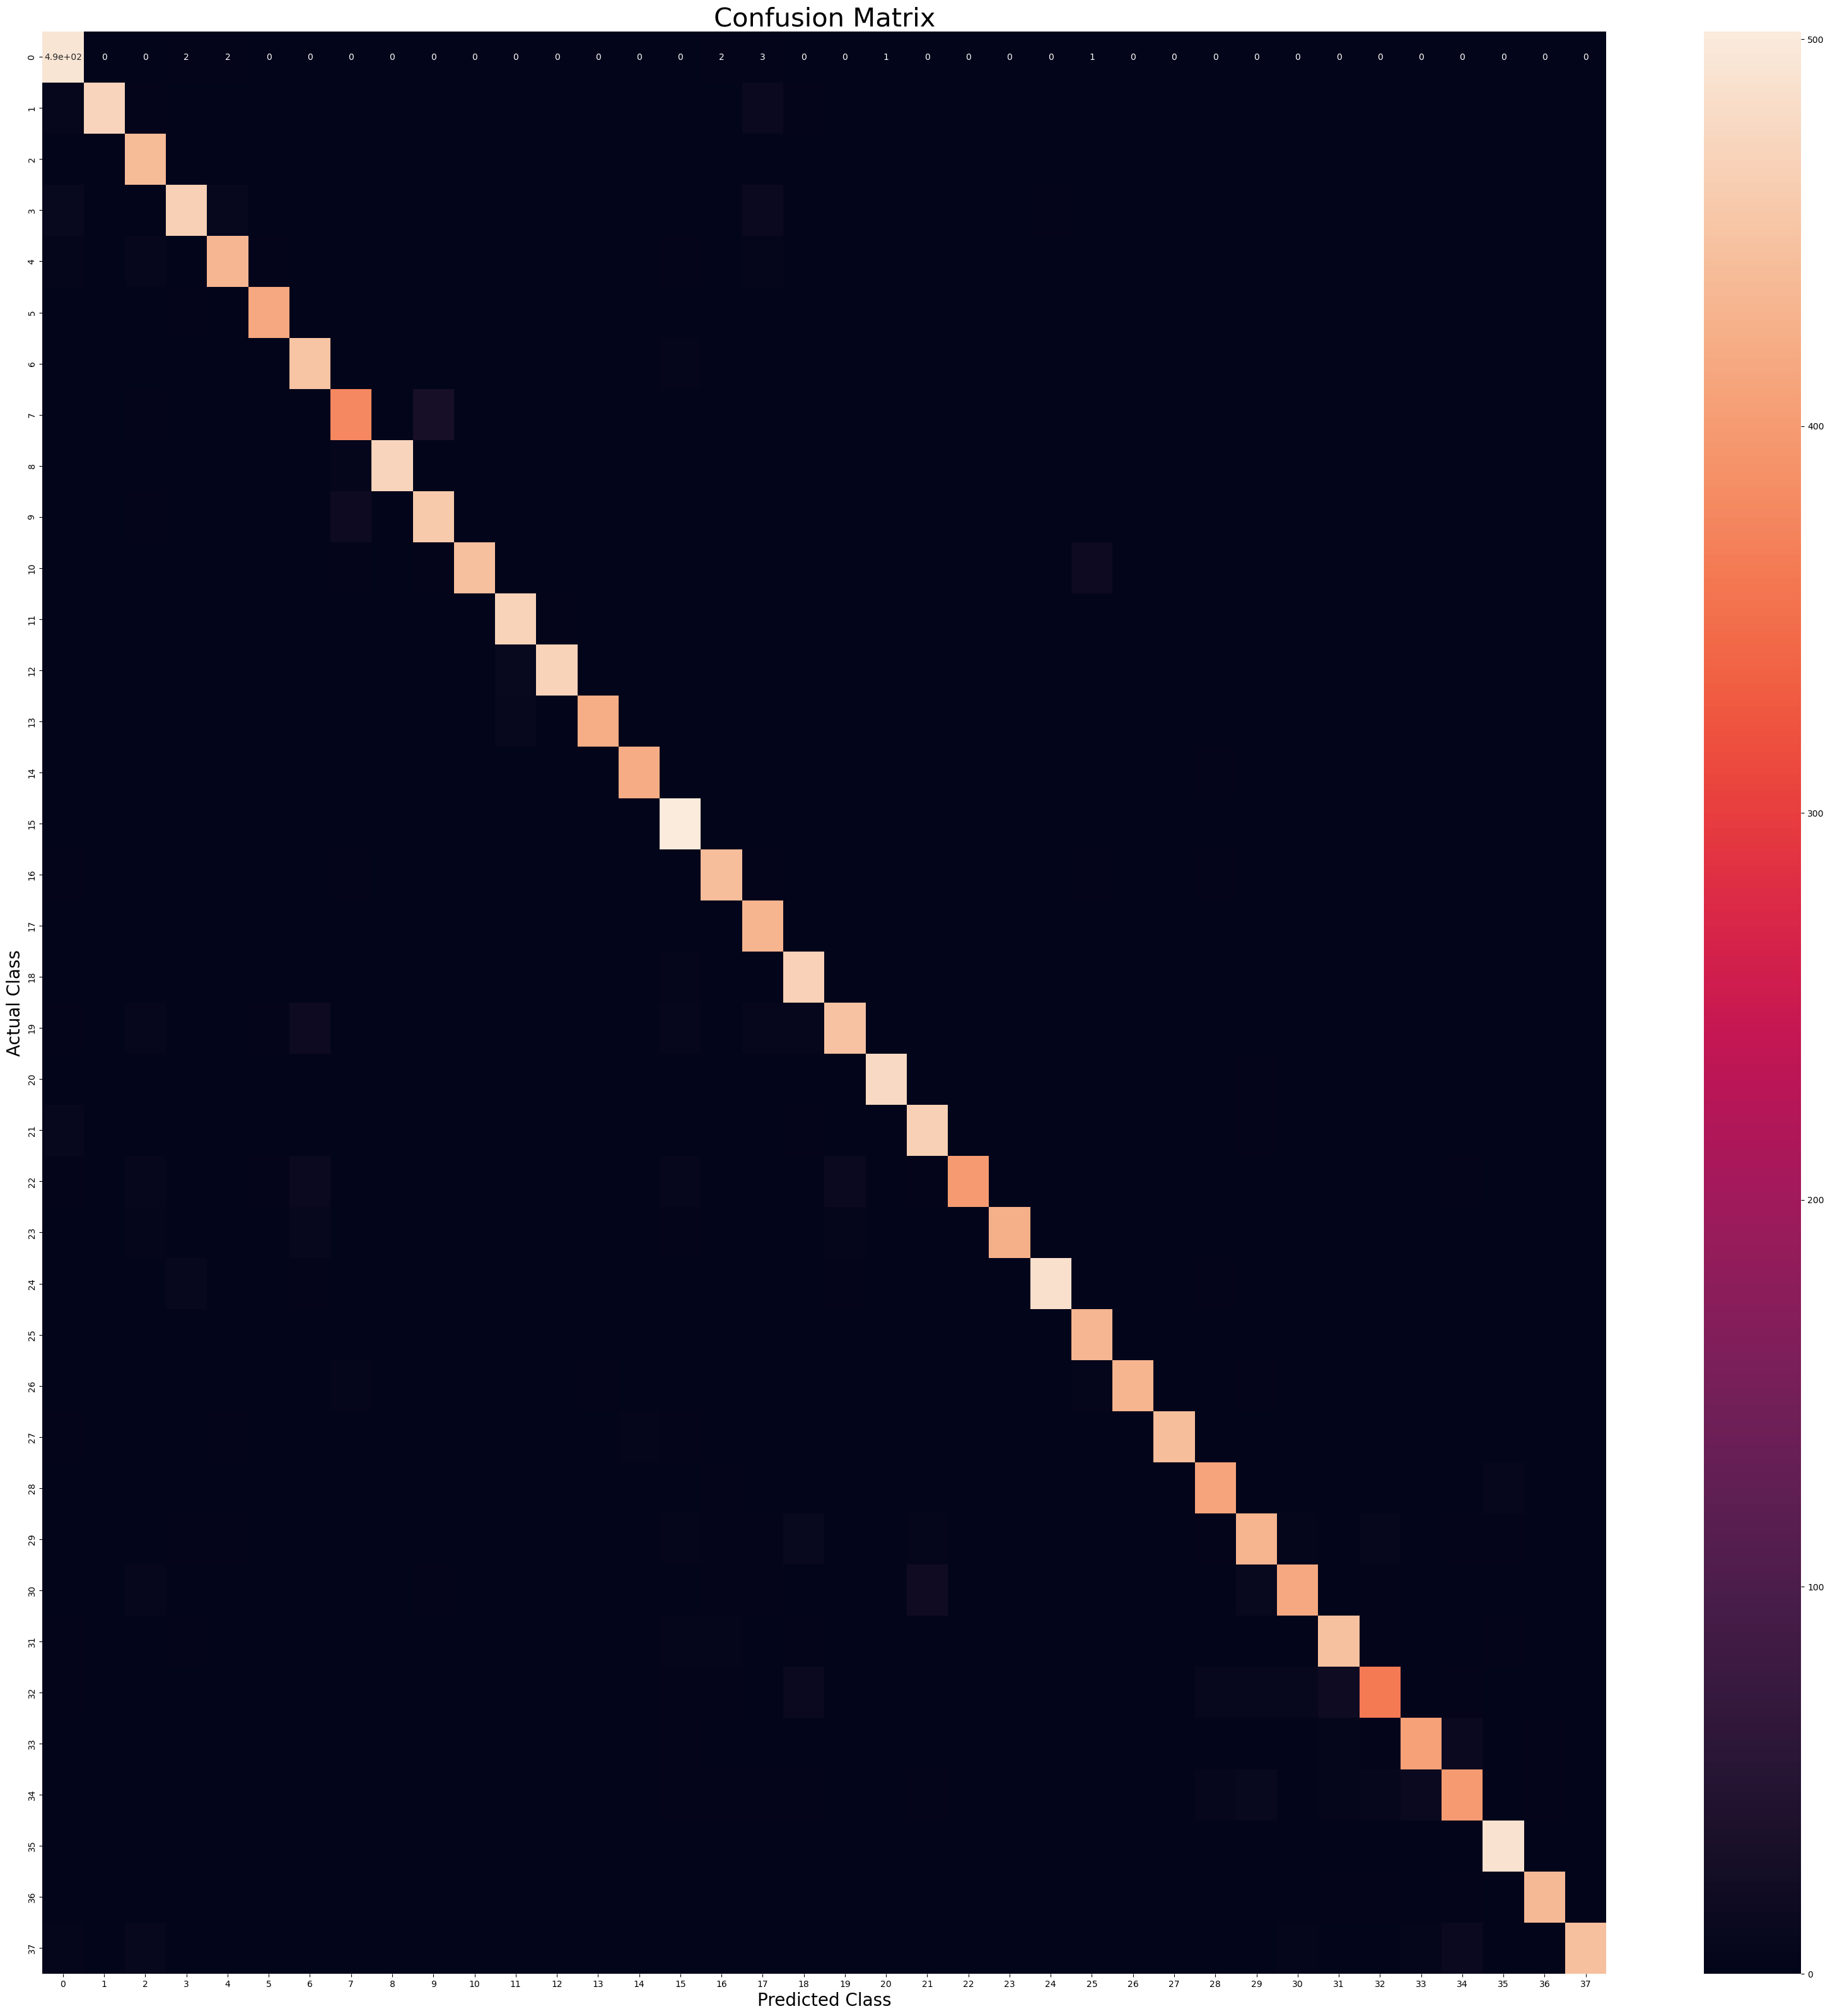

In [57]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Confusion Matrix",fontsize=30)
plt.show()
